# Predictive Analytics

## CROP YIELD PREDICTION

### 20BDS0170 STUTI
### 20BCE0765 ROHAN C
### 20BCI0014 VAISHNAV MENON
### 20BCE2028 SHASHANK AMANANA

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [13]:
df = pd.read_csv('yield_df.csv')
df.drop("Unnamed: 0", axis =1 , inplace = True)
df.head() # first 5 rows of the dataset

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,1996,12004.33,19.64
1,Andaman & Nicobar Islands,Maize,1990,20052,1996,12004.33,19.64
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,1996,12004.33,19.64
3,Andaman & Nicobar Islands,Potatoes,1990,210685,1996,12004.33,19.64
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,1996,12004.33,19.64


In [14]:
df.describe() 

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000
mean,2001.472970,79402.027102,1174.055835,48077.171702,20.980473
std,7.060078,86530.686797,707.913760,65751.304038,5.904574
min,1990.000000,866.000000,51.000000,0.920000,1.610000
25%,1995.000000,20728.000000,591.000000,8674.580000,17.330000
50%,2001.000000,38260.000000,1083.000000,34468.930000,22.120000
75%,2008.000000,107692.000000,1738.000000,58349.440000,25.960000
max,2013.000000,457565.000000,3240.000000,367778.000000,29.410000


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


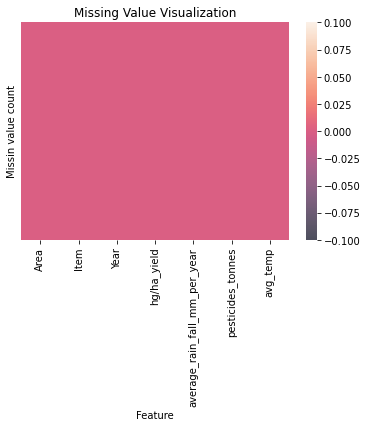

In [15]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels=False, alpha = 0.7)
plt.title("Missing Value Visualization")
plt.xlabel("Feature")
plt.ylabel("Missin value count")
plt.show()

In [16]:
categorical_features = [feature for feature in df.columns if feature != 'Name' and df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if feature != 'Name' and feature not in categorical_features]
print("Numerical Features: ",numerical_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
Categorical Features:  ['Area', 'Item']


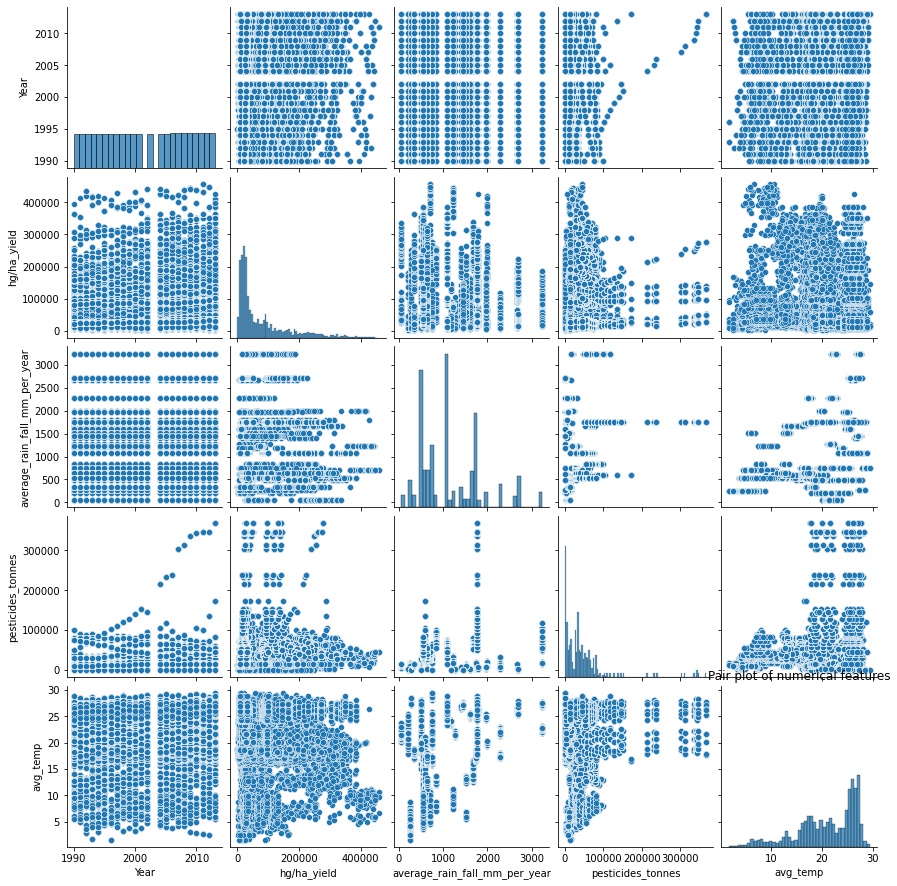

In [17]:
sns.pairplot(df[numerical_features])
plt.title("Pair plot of numerical features")
plt.show()

In [18]:
print("Correlation Matrix:\n ")
df.corr()

Correlation Matrix:
 


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091020,-0.001776,0.177390,0.021680
hg/ha_yield,0.091020,1.000000,-0.023346,0.054912,-0.116754
average_rain_fall_mm_per_year,-0.001776,-0.023346,1.000000,0.199511,0.306112
pesticides_tonnes,0.177390,0.054912,0.199511,1.000000,0.009919
avg_temp,0.021680,-0.116754,0.306112,0.009919,1.000000


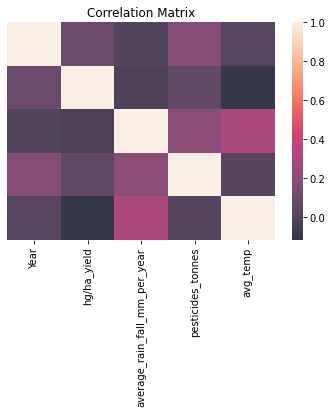

In [19]:
sns.heatmap(df.corr(), yticklabels=False,cmap = 'rocket', alpha = 0.8)
plt.title("Correlation Matrix")
plt.show()

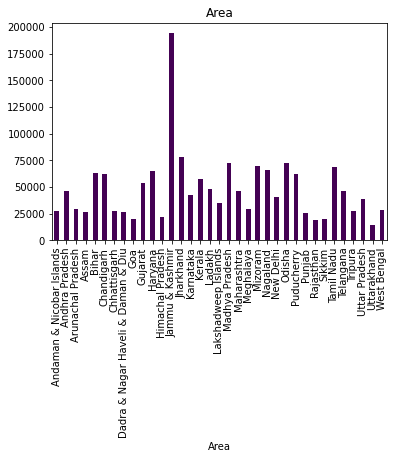

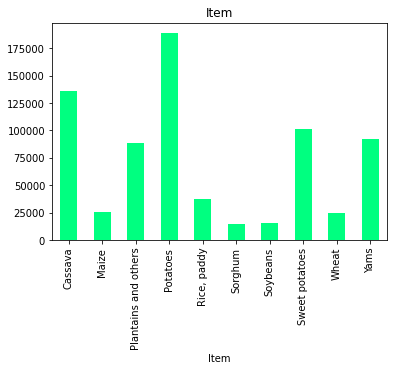

In [20]:
for i,feature in enumerate(categorical_features): 
    colors = ['viridis','winter_r','rocket','twilight']
    df.groupby(feature)['hg/ha_yield'].median().plot.bar(cmap= colors[i])
    plt.title(feature)
    plt.show()

In [21]:
keys =[]
vals = []
for feature in numerical_features: 
    keys.append(feature)
    vals.append(df['hg/ha_yield'].corr(df[feature]))

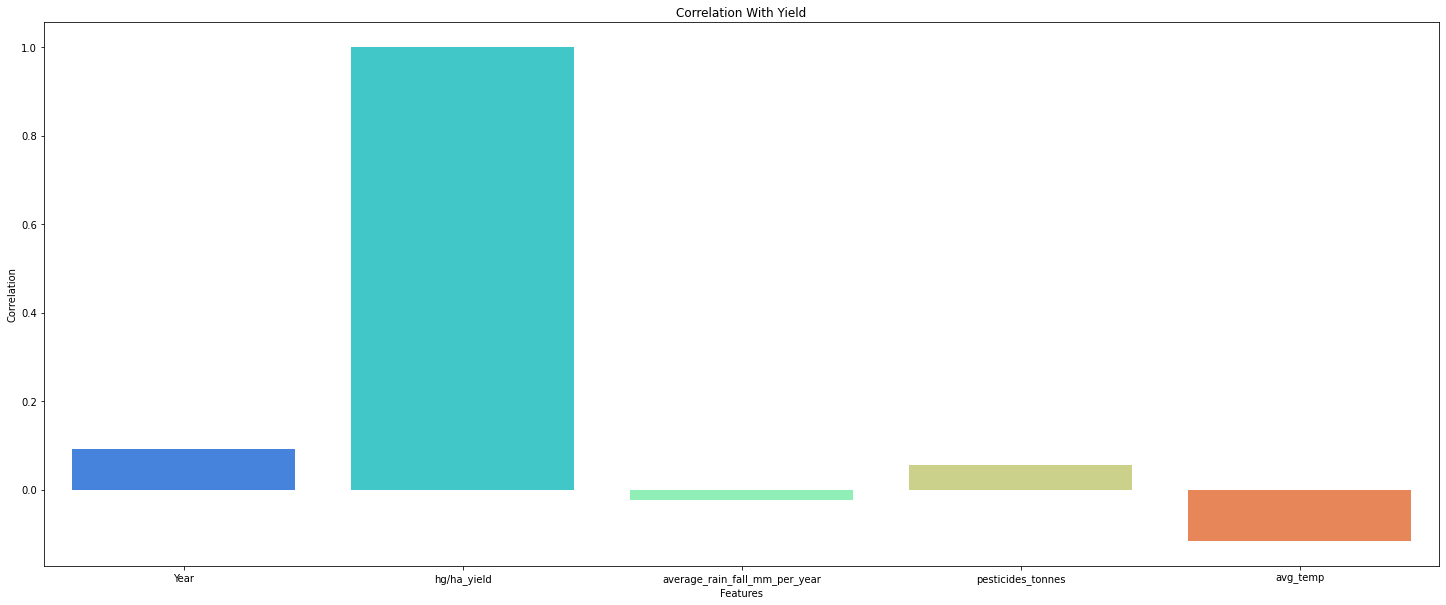

In [45]:
sns.barplot(keys,vals,palette='rainbow')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation With Yield")
plt.rcParams['figure.figsize'] = [9,3]
plt.show()

### Data Preprocessing

#### Outlier Detection and Removal

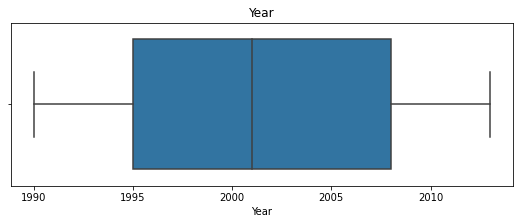

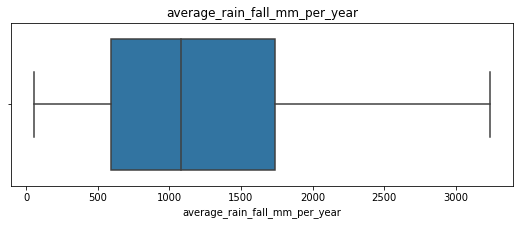

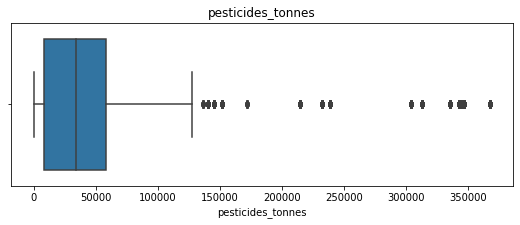

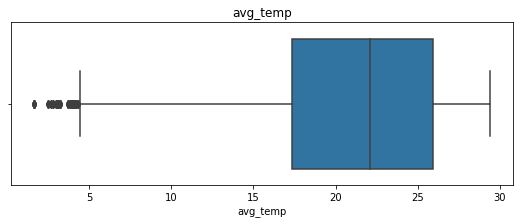

In [46]:
for feature in numerical_features:
    if feature != 'hg/ha_yield':
        sns.boxplot(df[feature])
        plt.title(feature)
        plt.show()

In [47]:
# Removing the outliers using Quantile Method. 
min_vals = []
max_vals= []
for feature in ['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']:
    min_vals.append(df[feature].quantile(0.05))
    max_vals.append(df[feature].quantile(0.95))
num_feat=['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
for i,feature in enumerate(num_feat):
    df = df[(df[feature] <= max_vals[i]) & (df[feature] >= min_vals[i])]
df.shape

(16216, 7)

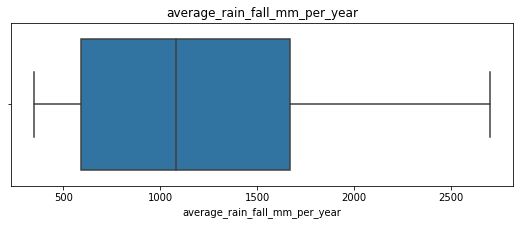

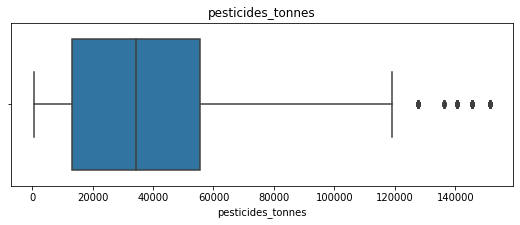

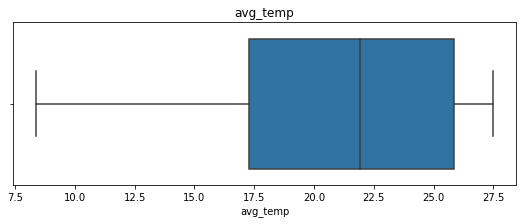

In [48]:
for feature in num_feat:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

#### Feature Scaling and Encoding

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
df[['average_rain_fall_mm_per_year','pesticides_tonnes']] = scaler.fit_transform(df[['average_rain_fall_mm_per_year','pesticides_tonnes']])
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,3.501698,0.382409,19.64
1,Andaman & Nicobar Islands,Maize,1990,20052,3.501698,0.382409,19.64
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,3.501698,0.382409,19.64
3,Andaman & Nicobar Islands,Potatoes,1990,210685,3.501698,0.382409,19.64
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,3.501698,0.382409,19.64


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['avg_temp'] = encoder.fit_transform(df[['avg_temp']])
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,3.501698,0.382409,597
1,Andaman & Nicobar Islands,Maize,1990,20052,3.501698,0.382409,597
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,3.501698,0.382409,597
3,Andaman & Nicobar Islands,Potatoes,1990,210685,3.501698,0.382409,597
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,3.501698,0.382409,597


In [57]:
# Implementing one hot encoding on Crop Type column
ft = pd.get_dummies(df['Item'], drop_first=True)
df.drop('Item', axis = 1, inplace = True)
df = pd.concat([df,ft], axis =1)
df.head()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,Andaman & Nicobar Islands,1990,31400,3.501698,0.382409,597,0,0,0,0,0,0,0,0,0
1,Andaman & Nicobar Islands,1990,20052,3.501698,0.382409,597,1,0,0,0,0,0,0,0,0
2,Andaman & Nicobar Islands,1990,394286,3.501698,0.382409,597,0,1,0,0,0,0,0,0,0
3,Andaman & Nicobar Islands,1990,210685,3.501698,0.382409,597,0,0,1,0,0,0,0,0,0
4,Andaman & Nicobar Islands,1990,31111,3.501698,0.382409,597,0,0,0,1,0,0,0,0,0


### Model Development

#### Data Splitting and Model Fitting

In [58]:
# Splitting the dataset into train test split
X = df.drop('hg/ha_yield', axis =1)
X.drop('Area',axis = 1, inplace = True)
Y = df[['hg/ha_yield']]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state= 0)
print("Test Size\t", len(x_test))
print("Train Size\t", len(x_train))

Test Size	 3244
Train Size	 12972


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
models = [LinearRegression(), RandomForestRegressor(),SVR(),DecisionTreeRegressor(),GradientBoostingRegressor(), AdaBoostRegressor()\
    ,ExtraTreesRegressor()]
for model in models: 
    model.fit(x_train,y_train)
    print(model)
    print("Accuracy on training set: ", model.score(x_train,y_train))
    print("Accuracy on testing set: ", model.score(x_test,y_test))
    

LinearRegression()
Accuracy on training set:  0.7197487678488481
Accuracy on testing set:  0.727588724425664
RandomForestRegressor()
Accuracy on training set:  0.9991460229470012
Accuracy on testing set:  0.9899057381428424
SVR()
Accuracy on training set:  -0.24088639773186538
Accuracy on testing set:  -0.23274229834777582
DecisionTreeRegressor()
Accuracy on training set:  1.0
Accuracy on testing set:  0.9827862144908066
GradientBoostingRegressor()
Accuracy on training set:  0.7993568835269254
Accuracy on testing set:  0.8160091298578076
AdaBoostRegressor()
Accuracy on training set:  0.5657287716858621
Accuracy on testing set:  0.5861141448978886
ExtraTreesRegressor()
Accuracy on training set:  1.0
Accuracy on testing set:  0.9934911906078361
